# LOGISTIC REGRESSION

## Logistic Regression is used when the dependent variable is categorical.

In [1]:
data= read.csv('C:/Users/T0SHIBA/DataScienceInR/data/diabetes_log_r.csv')

In [2]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [3]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

### We are predicting whether a person has diabetes or not
### Outcome 0 : Not Diabetic
### Outcome 1 : Diabetic

In [5]:
#install.packages('caTools')
library(caTools)
library(tidyverse)
library(ggplot2)

In [6]:
split <- sample.split(data$Outcome, SplitRatio = 0.75)

In [7]:
#get training and test data
data_train <- subset(data, split == TRUE)
data_test <- subset(data, split == FALSE)

In [8]:
dim(data_train)

[1] 576   9

In [9]:
dim(data_test)

[1] 192   9

In [10]:
names(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [11]:
#logistic regression model
logit <- glm (Outcome ~Pregnancies +Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age,
                 data = data_train, family = binomial)

In [12]:
summary(logit)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + 
    Age, family = binomial, data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5966  -0.7252  -0.4259   0.7463   2.9202  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.5428170  0.8281783 -10.315  < 2e-16 ***
Pregnancies               0.0785237  0.0361450   2.172   0.0298 *  
Glucose                   0.0358147  0.0042405   8.446  < 2e-16 ***
BloodPressure            -0.0124910  0.0060893  -2.051   0.0402 *  
SkinThickness             0.0072510  0.0080144   0.905   0.3656    
Insulin                  -0.0020532  0.0009971  -2.059   0.0395 *  
BMI                       0.0858522  0.0175367   4.896  9.8e-07 ***
DiabetesPedigreeFunction  1.0852477  0.3326229   3.263   0.0011 ** 
Age                       0.0208780  0.0102017   2.047   0.0407 *  
---
Sign

In [14]:
predicted_prob <- predict(logit,type = 'response', newdata=data_test[1:8])


In [15]:
head(predicted_prob)

1          2          6         15         16         18 
0.76715580 0.06166673 0.13264952 0.64358430 0.34462323 0.16503769

In [16]:
predicted_outcome = ifelse(predicted_prob>0.5,1,0)
head(predicted_outcome)

1  2  6 15 16 18 
 1  0  0  1  0  0

## CONFUSION MATRIX
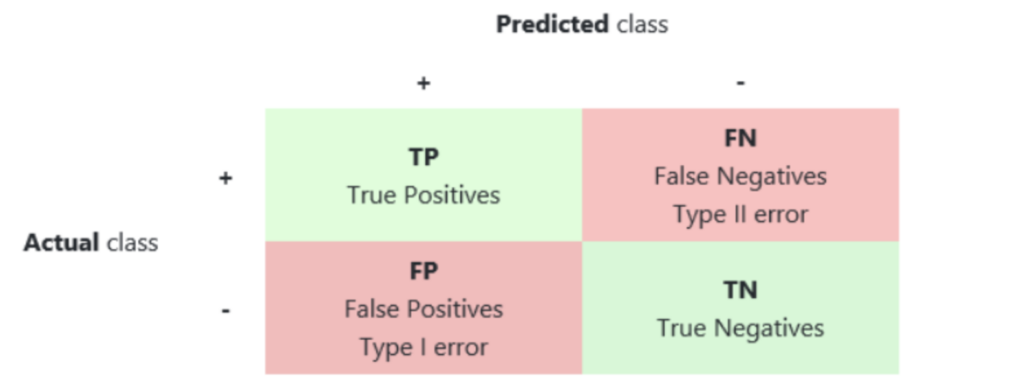

In [19]:
confusion_matrix = table(data_test$Outcome,predicted_outcome)
confusion_matrix

   predicted_outcome
      0   1
  0 112  13
  1  27  40

## Accuracy = 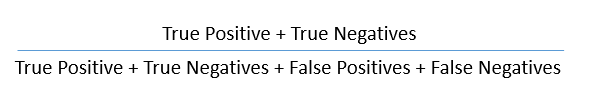

In [21]:
accuracy = (112+40) / (112+13+27+40)
accuracy

[1] 0.7916667

In [23]:
## install.pacakages("ROCR")
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



### ROC determines the accuracy of a classification model at a user defined threshold value. 
It determines the model's accuracy using Area Under Curve (AUC). Higher the area, better the model. ROC is plotted between True Positive Rate (Y axis) and False Positive Rate (X Axis). 

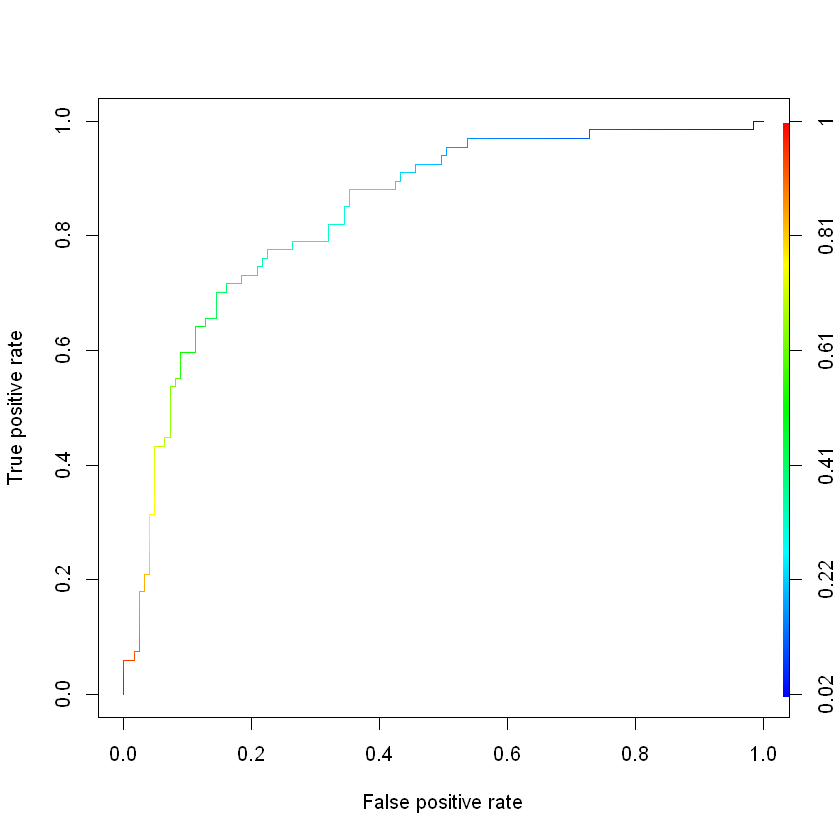

In [27]:
#ROCR Curve

ROCRpred <- prediction(predicted_prob, data_test$Outcome)
ROCRperf <- performance(ROCRpred, 'tpr','fpr')
plot(ROCRperf, colorize = TRUE )